# CHALLENGE NO 4
## SHORTEST DISTANCE TRAVELLED

### BACKGROUND
To get the final clue you will need to solve a classic problem. Imagine you are a truck owner and you have goods to deliver to different cities and then returning home again. To minimise cost and fuel consumption you strive to visit all of the cities using the shortest total travel distance. This means finding a visitation order of all cities that minimise the total distance travelled.

### DATA
The data consists of 51 rows. Each row represents a coordinate (x,y) where there is a city to visit. download ttd.txt

### ANSWER
The correct answer is the shortest distance (rounded to a whole number) travelled while visiting all 51 cities and returning to starting city.

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import math
sns.set()

In [2]:
raw = pd.read_csv('ttd.txt', sep=' ', header=None)

In [3]:
raw.columns = ['x', 'y']

    x   y
0  27  68
1  30  48
2  43  67
3  57  48
4  58  27


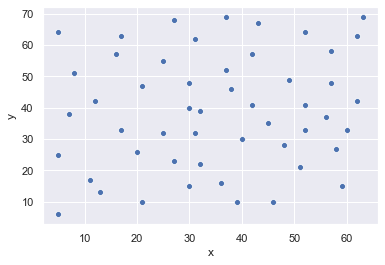

In [4]:
print(raw[:5])
sns.scatterplot(x=raw['x'], y=raw['y'])

In [15]:
def euclidian(a, b):
    return (pow( pow(a[0]-b[0],2) + pow(a[1]-b[1],2)  , .5))

In [16]:
size = raw['x'].size
distance_matrix = []
matrix = []
for i in range(size):
    for j in range(size):        
        result = euclidian(raw.values[i].tolist(), raw.values[j].tolist())        
        matrix.append(result)
    distance_matrix.append(matrix)
    matrix = []

In [17]:
import tsp

r = range(len(distance_matrix))

spath = { (i,j) : distance_matrix[i][j] for i in r for j in r }

print(tsp.tsp(r, spath))

(428.5484433161642, [0, 33, 47, 26, 6, 36, 12, 30, 11, 42, 29, 43, 21, 37, 20, 25, 1, 31, 22, 48, 32, 17, 49, 39, 50, 38, 15, 44, 14, 16, 18, 40, 19, 7, 13, 35, 23, 34, 4, 8, 24, 41, 46, 3, 27, 45, 9, 10, 28, 2, 5])


In [8]:


def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = distance_matrix
    data['num_vehicles'] = 1
    data['depot'] = 5
    return data

data = create_data_model()

from ortools.constraint_solver import pywrapcp
from ortools.constraint_solver import routing_enums_pb2


manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                       data['num_vehicles'], data['depot'])
routing = pywrapcp.RoutingModel(manager)

def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['distance_matrix'][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)

routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

def print_solution(manager, routing, solution):
  """Prints solution on console."""
  print('Objective: {} miles'.format(solution.ObjectiveValue()))
  index = routing.Start(0)
  plan_output = 'Route for vehicle 0:\n'
  route_distance = 0
  while not routing.IsEnd(index):
    plan_output += ' {} ->'.format(manager.IndexToNode(index))
    previous_index = index
    index = solution.Value(routing.NextVar(index))
    route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
  plan_output += ' {}\n'.format(manager.IndexToNode(index))
  print(plan_output)
  plan_output += 'Route distance: {}miles\n'.format(route_distance)

solution = routing.SolveWithParameters(search_parameters)
solution
if solution:
    print_solution(manager, routing, solution)

Objective: 445 miles
Route for vehicle 0:
 5 -> 2 -> 28 -> 10 -> 9 -> 45 -> 47 -> 26 -> 6 -> 36 -> 20 -> 25 -> 1 -> 22 -> 31 -> 43 -> 21 -> 37 -> 30 -> 12 -> 23 -> 34 -> 24 -> 41 -> 27 -> 3 -> 46 -> 8 -> 4 -> 35 -> 13 -> 7 -> 19 -> 40 -> 18 -> 11 -> 42 -> 29 -> 15 -> 44 -> 16 -> 14 -> 38 -> 50 -> 39 -> 49 -> 17 -> 48 -> 32 -> 0 -> 33 -> 5

